In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [16]:
df =pd.read_csv('/content/Netflix subscription fee Dec-2021.csv')

In [17]:
df.shape

(65, 8)

In [18]:
df.dtypes

Country_code                      object
Country                           object
Total Library Size                 int64
No. of TV Shows                    int64
No. of Movies                      int64
Cost Per Month - Basic ($)       float64
Cost Per Month - Standard ($)    float64
Cost Per Month - Premium ($)     float64
dtype: object

In [19]:
df.describe(include='object')

,Country_code,Country
count,65,65
unique,65,65
top,ie,Peru
freq,1,1


In [20]:
df['Country_code'].unique()

array(['ar', 'au', 'at', 'be', 'bo', 'br', 'bg', 'ca', 'cl', 'co', 'cr',
       'hr', 'cz', 'dk', 'ec', 'ee', 'fi', 'fr', 'de', 'gi', 'gr', 'gt',
       'hn', 'hk', 'hu', 'is', 'in', 'id', 'ie', 'il', 'it', 'jp', 'lv',
       'li', 'lt', 'my', 'mx', 'md', 'mc', 'nl', 'nz', 'no', 'py', 'pe',
       'ph', 'pl', 'pt', 'ro', 'ru', 'sm', 'sg', 'sk', 'za', 'kr', 'es',
       'se', 'ch', 'tw', 'th', 'tr', 'ua', 'gb', 'us', 'uy', 've'],
      dtype=object)

In [21]:
df['Country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Guatemala',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova',
       'Monaco', 'Netherlands', 'New Zealand', 'Norway', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'San Marino', 'Singapore', 'Slovakia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Uruguay', 'Venezuela'], dtype=object)

In [22]:
df.rename(columns=
        {'Country': 'country' ,
        'Total Library Size': 'total_library_size', 
        'No. of TV Shows': 'n_of_shows', 
        'No. of Movies': 'n_of_movies',
        'Cost Per Month - Basic ($)': 'cpm_basic', 
        'Cost Per Month - Standard ($)': 'cpm_standart', 
        'Cost Per Month - Premium ($)': 'cpm_premium'}, inplace=True)

In [23]:
columns = df.columns
columns

Index(['Country_code', 'country', 'total_library_size', 'n_of_shows',
       'n_of_movies', 'cpm_basic', 'cpm_standart', 'cpm_premium'],
      dtype='object')

In [24]:
# number of null values in each columns 
for i in columns:
    count =0
    k = df[i].isnull()
    for m in k:
        if m == True :
            count = count +1
    print(i ," = ",count)

Country_code  =  0
country  =  0
total_library_size  =  0
n_of_shows  =  0
n_of_movies  =  0
cpm_basic  =  0
cpm_standart  =  0
cpm_premium  =  0


In [25]:
df.corr()

,total_library_size,n_of_shows,n_of_movies,cpm_basic,cpm_standart,cpm_premium
total_library_size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
n_of_shows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
n_of_movies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
cpm_basic,-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
cpm_standart,-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
cpm_premium,-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


In [26]:
df.corr()

,total_library_size,n_of_shows,n_of_movies,cpm_basic,cpm_standart,cpm_premium
total_library_size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
n_of_shows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
n_of_movies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
cpm_basic,-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
cpm_standart,-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
cpm_premium,-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


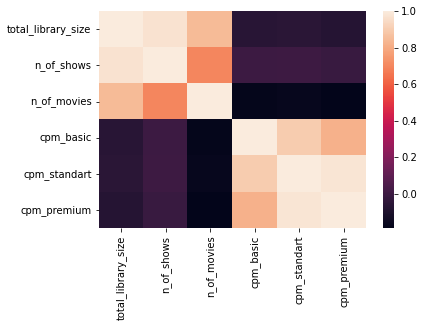

In [27]:
sns.heatmap(df.corr())

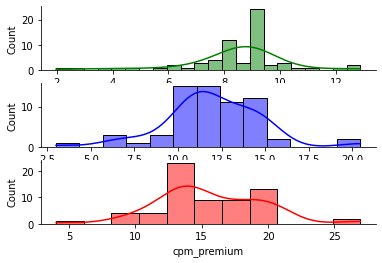

In [28]:
# Visualization of data

fig, axes = plt.subplots(3)

sns.histplot(data=df, x='cpm_basic', kde=True, ax=axes[0], color='green',)
sns.histplot(data=df, x='cpm_standart', kde=True, ax=axes[1], color='blue')
sns.histplot(data=df, x='cpm_premium', kde=True, ax=axes[2], color='red')

sns.despine()

In [29]:
top_10_basic = df.sort_values('cpm_basic', ascending=False) \
                .head(10)

top_10_standart = df.sort_values('cpm_standart', ascending=False) \
                .head(10)

top_10_premium = df.sort_values('cpm_premium', ascending=False) \
                .head(10)
tail_10_basic = df.sort_values('cpm_basic') \
                .head(10)

tail_10_standart = df.sort_values('cpm_standart') \
                .head(10)

tail_10_premium = df.sort_values('cpm_premium') \
                .head(10)

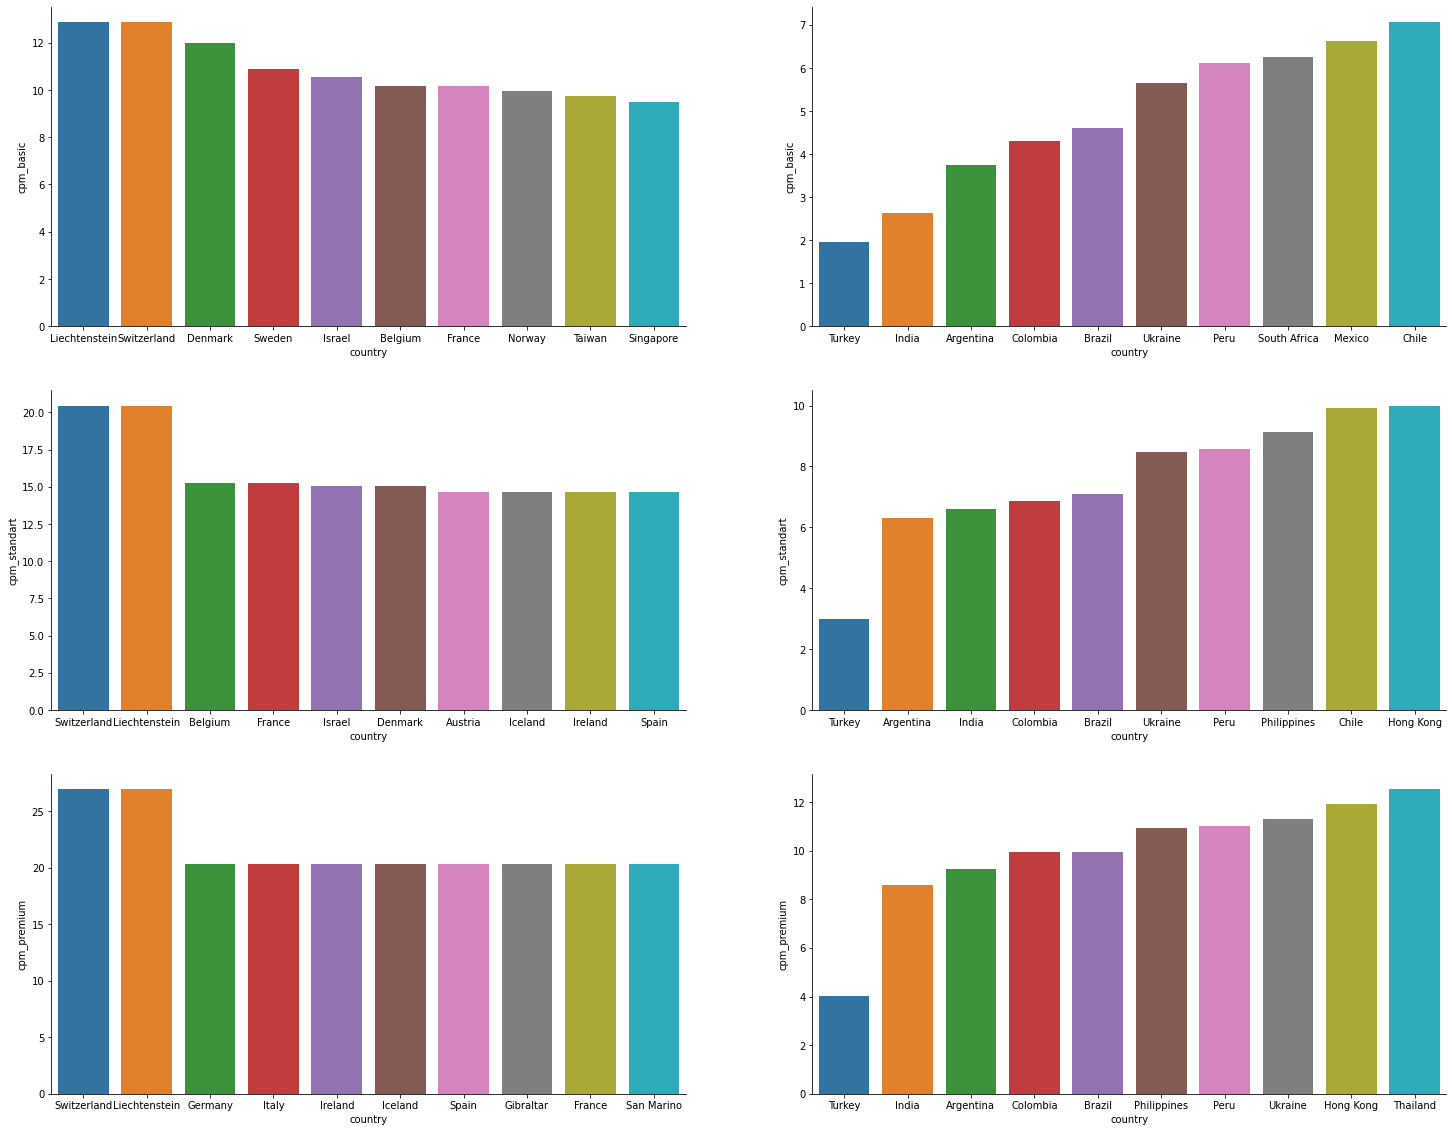

In [30]:
fig, axes = plt.subplots(3,2, figsize=(25, 20))

sns.barplot(x='country', y='cpm_basic', data=top_10_basic, ax=axes[0,0])
sns.barplot(x='country', y='cpm_standart', data=top_10_standart, ax=axes[1,0])
sns.barplot(x='country', y='cpm_premium', data=top_10_premium, ax=axes[2,0])

sns.barplot(x='country', y='cpm_basic', data=tail_10_basic, ax=axes[0,1])
sns.barplot(x='country', y='cpm_standart', data=tail_10_standart, ax=axes[1,1])
sns.barplot(x='country', y='cpm_premium', data=tail_10_premium, ax=axes[2,1])

sns.despine()

In [31]:
df.head()

,Country_code,country,total_library_size,n_of_shows,n_of_movies,cpm_basic,cpm_standart,cpm_premium
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


# conclusion
# Switzerland and Liechtenstein pay the most for Netflix
# Turkey and India pay the least for **Netflix**

